In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
fname = 'data5.csv'
data = np.genfromtxt(fname, delimiter=',', names=True)  #structured array
x = data['x']
y = data['y']

In [25]:
data

array([(0.        , 2.81280852), (0.04081633, 2.51295269),
       (0.08163265, 2.62499575), (0.12244898, 1.66917379),
       (0.16326531, 3.84934481), (0.20408163, 3.58238617),
       (0.24489796, 2.90965775), (0.28571429, 3.52261806),
       (0.32653061, 3.34097174), (0.36734694, 2.98943961),
       (0.40816327, 3.82247984), (0.44897959, 3.24715143),
       (0.48979592, 3.30816848), (0.53061224, 3.14810414),
       (0.57142857, 3.84472982), (0.6122449 , 3.64223163),
       (0.65306122, 4.04059257), (0.69387755, 3.54204229),
       (0.73469388, 3.98833773), (0.7755102 , 3.55971021),
       (0.81632653, 4.50917161), (0.85714286, 4.26675143),
       (0.89795918, 4.42405212), (0.93877551, 4.55182512),
       (0.97959184, 3.93081133), (1.02040816, 4.91924521),
       (1.06122449, 5.64935655), (1.10204082, 3.89705901),
       (1.14285714, 3.94881401), (1.18367347, 4.16034838),
       (1.2244898 , 5.43478409), (1.26530612, 5.18179142),
       (1.30612245, 5.7621152 ), (1.34693878, 5.69184521

In [24]:
data.shape

(50,)

In [26]:
type(data)

numpy.ndarray

In [12]:
beta = np.array([0.5,0.75])  # start point
def gradient(beta):
    df0 = 0
    for i in range (len(x)):
        df0 += -2*(y[i]-math.exp(beta[0]+beta[1]*x[i]))*math.exp(beta[0]+beta[1]*x[i])

    df1 = 0
    for i in range (len(x)):
        df1 += -2*(y[i]-math.exp(beta[0]+beta[1]*x[i]))*math.exp(beta[0]+beta[1]*x[i])*x[i]

    return np.array([df0, df1])
gradient(beta)

array([-277.89974678, -282.02426641])

In [13]:
def J(beta):
    J00=0
    J01=0
    J10=0
    J11=0
    #    J[0][0] = -np.sum(2*y*np.exp(beta[0]+beta[1]*x)-4*np.exp(2*beta[0]+2*beta[1]*x))
    for i in range (len(x)):
        J00 += -2*(y[i]*math.exp(beta[0]+beta[1]*x[i])-2*math.exp(2*beta[0]+2*beta[1]*x[i]))

    for i in range (len(x)):
        J01 += -2*(x[i]*y[i]*math.exp(beta[0]+beta[1]*x[i])-2*x[i]*math.exp(2*beta[0]+2*beta[1]*x[i]))

    for i in range (len(x)):
        J10 += -2*(x[i]*y[i]*math.exp(beta[0]+beta[1]*x[i])-2*x[i]*math.exp(2*beta[0]+2*beta[1]*x[i]))

    for i in range (len(x)):
        J11 += -2*(x[i]*y[i]*x[i]*math.exp(beta[0]+beta[1]*x[i])-2*x[i]*x[i]*math.exp(2*beta[0]+2*beta[1]*x[i]))

    return np.array([[J00, J01],[J10, J11]])
J(beta)

array([[1474.68839977, 2265.88996475],
       [2265.88996475, 3746.90298484]])

In [14]:
# 1] SSE at Beta_truth
beta_truth = np.array([1.0,0.5])
SSE = 0
for i in range(len(x)):
    SSE += (y[i]-math.exp(beta_truth[0]+beta_truth[1]*x[i]))**2
print("SSE at b_truth = (1.0, 0.5)^T is",format(SSE,'.4f'))

SSE at b_truth = (1.0, 0.5)^T is 12.0146


In [15]:
# 1&2 loss, beta, iteration
beta = np.array([0.5,0.75])  # start point
max_iters = 20  # maximum number of iterations
iters = 0  #iteration counter
loss_history = [int(1000),int(900)]
tolerance = 0.0000000001
diff = abs(loss_history[-1] - loss_history[-2])
loss = 0
for i in range (len(x)):
    loss += (y[i]-math.exp(beta[0]+beta[1]*x[i]))**2

print("iteration","\t","beta_hat","\t\t\t","loss")
print("initial\t\t",beta,"\t\t\t",format(loss,'.16f'))

while diff > tolerance and iters < max_iters:
    beta = beta-np.linalg.inv(J(beta)).dot(gradient(beta))
    loss = 0
    for i in range (len(x)):
        loss += (y[i]-math.exp(beta[0]+beta[1]*x[i]))**2
    iters += 1
    print(iters,"\t\t",np.round(beta,8),"\t",format(loss,'.16f'))
    loss_history.append(loss)
    diff = abs(loss_history[-1] - loss_history[-2])
#    print(gradient(beta))

print("\nThe smallest loss achieved =",format(loss,'.16f'))
print("The fitted beta =", np.round(beta,5),"^T")
print("The number of iteration needed to reach this loss =",iters)

iteration 	 beta_hat 			 loss
initial		 [0.5  0.75] 			 52.5878764032458434
1 		 [1.52803886 0.20357575] 	 86.7162610628762849
2 		 [1.19835774 0.38368614] 	 19.8826873018138279
3 		 [1.03209878 0.48346503] 	 12.2028742723290815
4 		 [0.99943653 0.50282426] 	 12.0003885870393479
5 		 [0.99834641 0.5034644 ] 	 12.0001794095701548
6 		 [0.99834523 0.50346509] 	 12.0001794093252734
7 		 [0.99834523 0.50346509] 	 12.0001794093252698

The smallest loss achieved = 12.0001794093252698
The fitted beta = [0.99835 0.50347] ^T
The number of iteration needed to reach this loss = 7


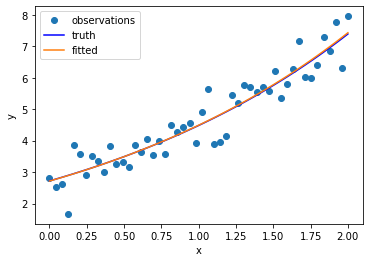

In [16]:
# 3] plot of fitted regression funtion + truth
fig = plt.figure(figsize=(20,4))

ax1 = fig.add_subplot(131)
ax1.plot(x, y, 'o', label='observations')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.plot(x, np.exp(1+0.5*x), label='truth', color='b')
ax1.plot(x, np.exp(beta[0]+beta[1]*x),label='fitted')
ax1.legend()

plt.show()

In [20]:
MSE = []
# 4] prediction error using LOOCV
cv = LeaveOneOut()
for train, test in cv.split(x):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    #print(y_test)
    fitted_y = np.exp(beta[0]+beta[1]*x_test)
    MSE.append((y_test - fitted_y)**2)
print("Estimated RMSE via LOOCV =",math.sqrt(np.mean(MSE)))

[2.81280852]
[2.51295269]
[2.62499575]
[1.66917379]
[3.84934481]
[3.58238617]
[2.90965775]
[3.52261806]
[3.34097174]
[2.98943961]
[3.82247984]
[3.24715143]
[3.30816848]
[3.14810414]
[3.84472982]
[3.64223163]
[4.04059257]
[3.54204229]
[3.98833773]
[3.55971021]
[4.50917161]
[4.26675143]
[4.42405212]
[4.55182512]
[3.93081133]
[4.91924521]
[5.64935655]
[3.89705901]
[3.94881401]
[4.16034838]
[5.43478409]
[5.18179142]
[5.7621152]
[5.69184521]
[5.54582172]
[5.69472695]
[5.58231243]
[6.21826803]
[5.33843427]
[5.81407594]
[6.27069734]
[7.1767221]
[6.02317737]
[5.99794487]
[6.39062007]
[7.2944674]
[6.83273251]
[7.75570757]
[6.30352261]
[7.95331767]
Estimated RMSE via LOOCV = 0.4899016107204643


In [21]:
MSE_10fold = []
mse=0
# 5] prediction error using the 10-fold cross validation approach
cv_10fold = KFold(n_splits=10, random_state=10, shuffle=True)
for train, test in cv_10fold.split(x):
    x_train_10fold, x_test_10fold = x[train], x[test]
    y_train_10fold, y_test_10fold = y[train], y[test]
    fitted_y_10fold = np.exp(beta[0]+beta[1]*x_train_10fold)
    MSE_10fold.append((y_train_10fold-fitted_y_10fold)**2)
RMSE = math.sqrt(np.mean(MSE_10fold))
print("Estimated RMSE via 10-fold CV =",RMSE)

Estimated RMSE via 10-fold CV = 0.4899016107204643
